**Vivian Nguyen**

Spring 2023

CS 251: Data Analysis and Visualization

Project 2: Matrix Transformations

In [72]:
import numpy as np
import matplotlib.pyplot as plt

import data
import transformation

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20, 'figure.figsize': (4, 4)})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Project 2: Matrix Transformations

The goal of this project is to give you practice using matrix multiplication to efficiently transform data (translation, scaling, and rotation). To that end, you'll develop the Transformation class as a child class of Analysis, from Project 1. 

We expect you to create the transformation matrices and and apply them from data using matrix multiplication yourself — **you may not call high-level functions to do all the work for you**. Functions similar to the following are fine to use:

- creating an identity matrix with `np.eye()`
- creating matrices of zeros or ones with `np.zeros()` or `np.ones()`
- concatenating matrices with `np.hstack()` or `np.vstack()`

Here is an **overview** of Transformation class's methods in transformation.py (use tasks below to guide you through the implementation):
1. `__init__()`: The constructor.
1. `get_data_homogeneous()`: Adds a column of normal homogeneous coordinates to the data matrix.
2. `project()`: Projects the M-dimensional Data object in self.data onto a subset of its axes.
3. Construct homogeneous transformation matrices (in any order):
> * `translation_matrix()`: Constructs an M+1-by-M+1 translation matrix for shifting the M-dimensional Data object in self.data
> * `scale_matrix()`: Constructs an M+1-by-M+1 scale matrix for resizing the M-dimensional Data object in self.data
> * `rotation_matrix_3d()`: Constructs a 4x4 rotation matrix for rotating the 3-dimensional Data object in self.data
4. Apply transformation matrices to the Data object in self.data (with homogeneous coordinates):
> * `translate()`: Uses a translation matrix to transform self.data
> * `scale()`: Uses a scale matrix to transform self.data
> * `rotate_3d()`: Uses a 3D rotation matrix to transform self.data (which must, in this case, contain exactly 3 features, plus the normal homogeneous coordinate)
> * `transform()`: Uses a homogeneous transformation matrix (passed as a parameter) to transform self.data.
5. Normalization:
> * `normalize_together()`: Uses homogeneous transformation matrices to normalize all the features of self.data together, using the global min and max.
> * `normalize_separately()`: Uses homogeneous transformation matrices to normalize each feaure separately, using its own local min and max.
6. Visualization:
> * `scatter_color()`: Similar to Analysis.scatter(), but using a third feature to control the color of the plotted data points.

Use this notebook to demo your completed Transformation class (transformation.py).

## Task 0) Preprocess Iris data

- Copy over `data.py`, `analysis.py`, and `iris.csv` from Project 1.
- In whatever way you wish, replace the `species` strings with ints — i.e. setosa -> 0, versicolor -> 1, virginica -> 2. *Remember to change the type to numeric!*

## Task 1) Visualizing multi-dimensional data (>3D) with color scales

The Iris dataset has too many dimensions to visualize in 2D space with a standard scatterplot! Let's see what we can do about that.

In this task, you will use color to visualize a third dimension of the Iris dataset. Your color scale should be colorblind friendly.

- Implement the constructor and `scatter_color()` method to your `Transformation` class that uses color to represent a third axis on a 2D scatterplot.
    - Use a ColorBrewer color palette to implement the color scale (e.g. from the `palettable` library).
    - To do so, go to https://jiffyclub.github.io/palettable/colorbrewer/, and examine maps in the 3 categories (diverging, qualitative, and sequential) to find the appropriate map. Access via the naming scheme below. The map has an attribute named mpl_colormap that can be passed in to `scatter` to control the colors (as the value for the cmap parameter). We use the third feature (which we are calling `Z` here) to determine which values of the color map are used for which data points. We can also control the outline of the points with the edgecolor argument (here we make it black):

```
color_map = palettable.colorbrewer.sequential.Purples_9
scatter(X, Y, c=Z, s=75, cmap=color_map.mpl_colormap, edgecolor='black')
```

- Use your `scatter_color()` method to recreate the images below.
    * One with headers [`sepal_length`, `petal_length`, `sepal_width`].
    * Another with headers [`sepal_length`, `petal_length`, `species`].

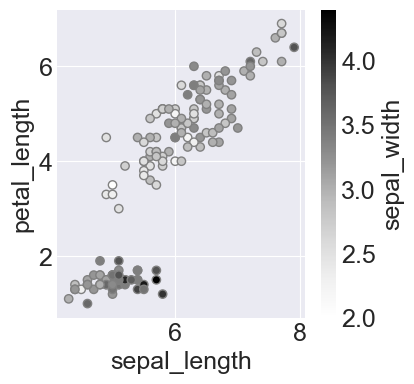

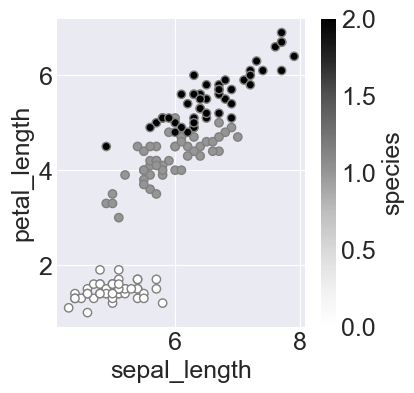

In [73]:
# Your code here
iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data, iris_data)


headers = ['sepal_length', 'petal_length', 'sepal_width']
headers2 = ['sepal_length', 'petal_length', 'species']
# iris_trans.project(headers)
iris_trans.scatter_color('sepal_length', 'petal_length', 'sepal_width')

iris_trans.project(headers2)
iris_trans.scatter_color('sepal_length', 'petal_length', 'species')

#### Your results should look like the following

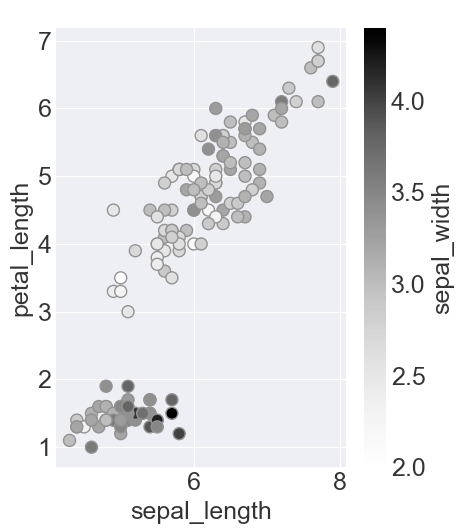

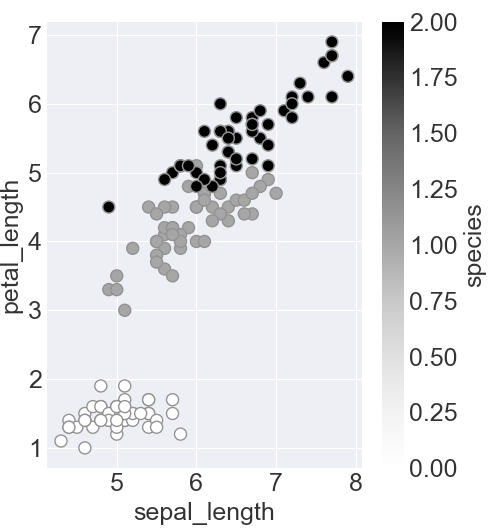

**Question 1:** In a scatterplot, is color a more useful representation of __continuous__ features (like sepal width) or __discrete__ features (like species)? Why do you think that is?

**Answer 1:**
Color is a more useful representation of continuous features because you can visually check how the pattern changes. The color fades or grows stronger with continuous features versus in discrete features, there is no in-between stages.

## Task 2) Implement transformation matrices

Implement the following methods in `transformation.py`, running the following test code to guide you as you work. 
- `project(headers)`: "project" the data on the list of data variables specified by `headers` — i.e. select a subset of the variables from the original dataset.
- `get_data_homogeneous`: Helper method to get a version of the projected data array with an added homogeneous coordinate.
- `translation_matrix(magnitudes)`: Make an M-dimensional homogeneous transformation matrix for translation
- `scale_matrix(magnitudes)`: Make an M-dimensional homogeneous scaling matrix for scaling.

### Test (i): Translation

Write test code in the cell below that does the following. Note the below expected output.

* Create Data and Transformation objects for the Iris dataset. 
* Project the Transformation object's data onto the first 3 axes (`sepal_length`, `sepal_width`, and `petal_length`).
* Create a translation matrix that would shift the projected data by -0.5 along `sepal_length` and +1.5 along `petal_length`, then print the translation matrix. 

In [74]:
# Your test code here
iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data)

headers = ['sepal_length', 'sepal_width', 'petal_length']
iris_trans.project(headers)

# print(iris_trans)

trans_mat = iris_trans.translation_matrix([-0.5, 0.0, 1.5])
print(trans_mat)

[[ 1.   0.   0.  -0.5]
 [ 0.   1.   0.   0. ]
 [ 0.   0.   1.   1.5]
 [ 0.   0.   0.   1. ]]


**Your output should look like:**

    Translation matrix:
    [[ 1.   0.   0.  -0.5]
     [ 0.   1.   0.   0. ]
     [ 0.   0.   1.   1.5]
     [ 0.   0.   0.   1. ]]

### Test (ii): Scaling

* Create a scaling matrix that would scale the projected data by 2 along `sepal_width` and 1/3 along `petal_length`, then print the scaling matrix.

In [75]:
# Your test code here

scale_mat = iris_trans.scale_matrix([1, 2, (1/3)])
print(scale_mat)

[[1.      0.      0.      0.     ]
 [0.      2.      0.      0.     ]
 [0.      0.      0.33333 0.     ]
 [0.      0.      0.      1.     ]]


**Your output should look like:**

    Scale matrix:
    [[1.      0.      0.      0.     ]
     [0.      2.      0.      0.     ]
     [0.      0.      0.33333 0.     ]
     [0.      0.      0.      1.     ]]

## Task 3) Transformation Detective

The objective of this task is to determine the set of matrix transformations to apply to the specified data and what variables to project onto in order to reproduce the below plots.

### 3a) Hello, Iris

- Create Data and Transformation objects for the Iris dataset.
- Project the dataset onto all the headers.
- Use the Transfromation object to generate a pair plot of the entire Iris dataset. (*Your results should look just like the example, below.*)

(<Figure size 1200x1200 with 25 Axes>,
 array([[<AxesSubplot: ylabel='sepal_length'>, <AxesSubplot: >,
         <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
        [<AxesSubplot: ylabel='sepal_width'>, <AxesSubplot: >,
         <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
        [<AxesSubplot: ylabel='petal_length'>, <AxesSubplot: >,
         <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
        [<AxesSubplot: ylabel='petal_width'>, <AxesSubplot: >,
         <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
        [<AxesSubplot: xlabel='sepal_length', ylabel='species'>,
         <AxesSubplot: xlabel='sepal_width'>,
         <AxesSubplot: xlabel='petal_length'>,
         <AxesSubplot: xlabel='petal_width'>,
         <AxesSubplot: xlabel='species'>]], dtype=object))

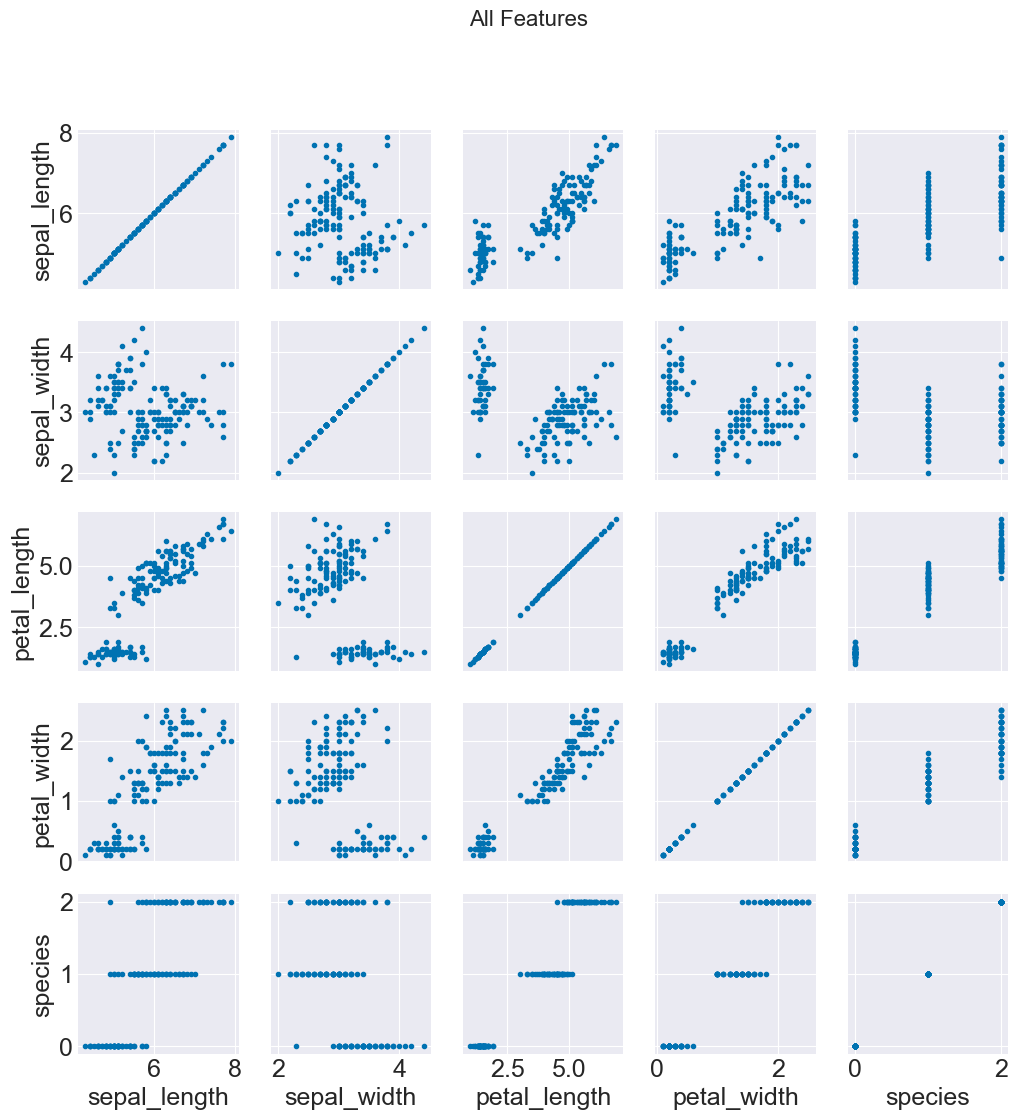

In [96]:
# Your code here
iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data)
headers = iris_data.get_headers()

iris_trans.project(headers)

iris_trans.pair_plot(headers, title='All Features')

#### Your results should look like the image below.

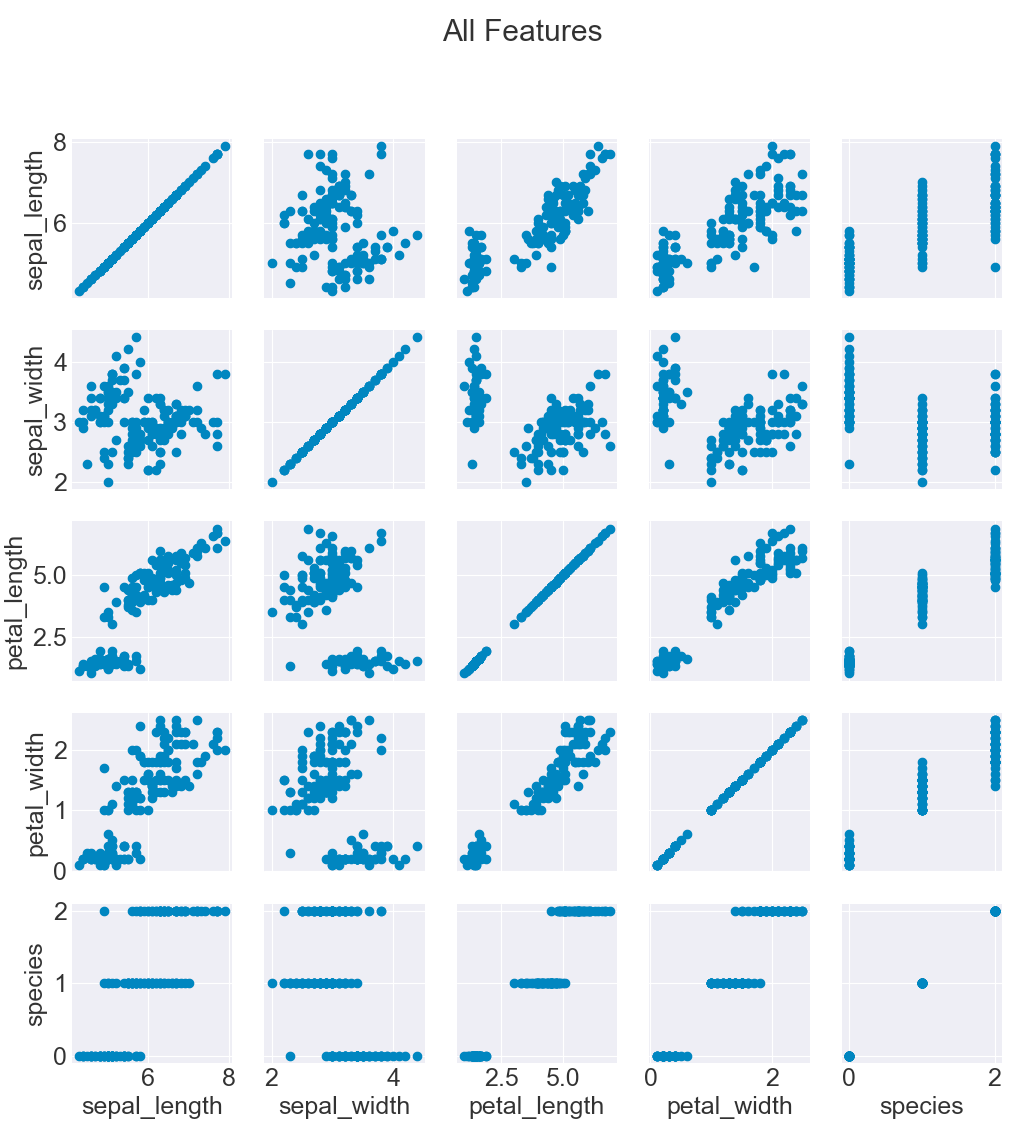

**Question 2:** How many dimensions (features) does the Iris dataset contain?

**Answer 2:**

The Iris dataset contains 5 dimensions.

### 3b) Solve transformation mystery 1

- Make a Transformation object.
- Determine the set of variables to project onto to recreate the image below.
- Create a pair plot identical to the one below based on the projected data.

(<Figure size 1200x1200 with 9 Axes>,
 array([[<AxesSubplot: ylabel='sepal_length'>, <AxesSubplot: >,
         <AxesSubplot: >],
        [<AxesSubplot: ylabel='petal_length'>, <AxesSubplot: >,
         <AxesSubplot: >],
        [<AxesSubplot: xlabel='sepal_length', ylabel='petal_width'>,
         <AxesSubplot: xlabel='petal_length'>,
         <AxesSubplot: xlabel='petal_width'>]], dtype=object))

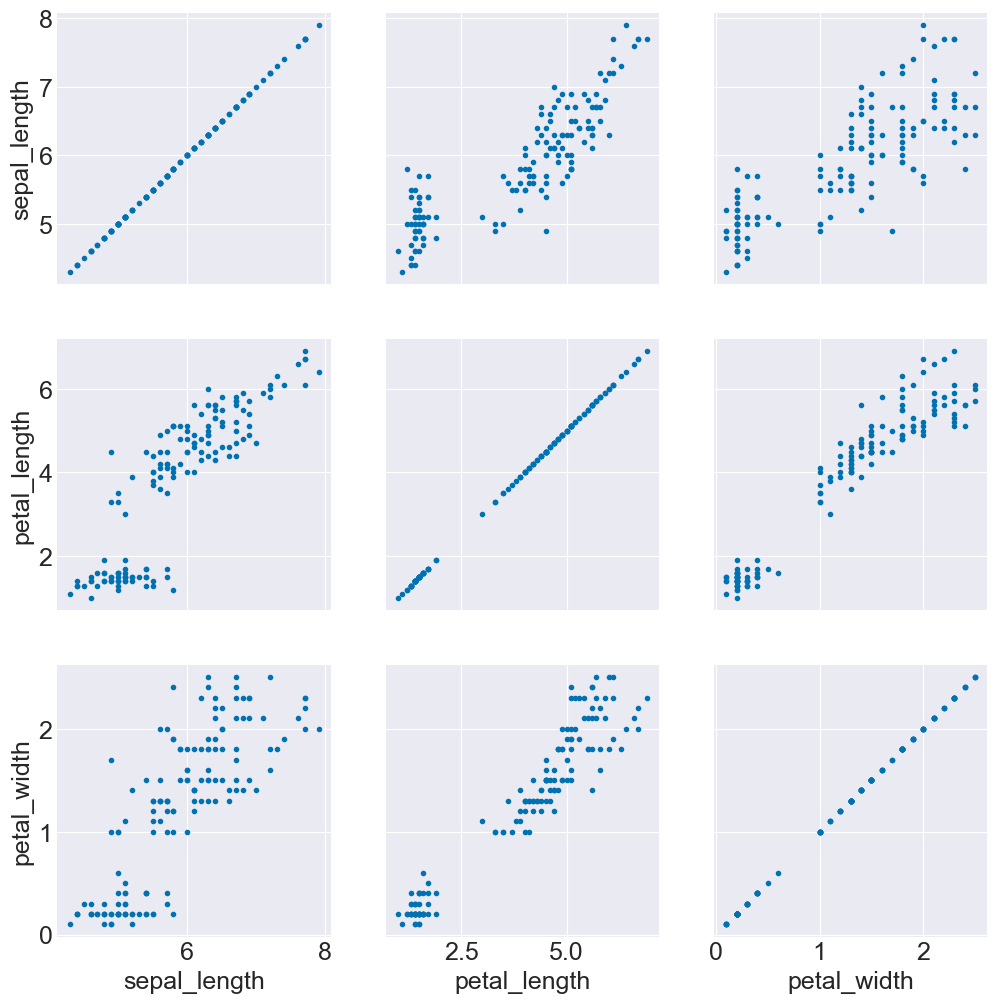

In [95]:
# Your code here

iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data)
myst1_headers = ['sepal_length', 'petal_length', 'petal_width']
iris_trans.project(myst1_headers)
iris_trans.pair_plot(myst1_headers)

#### Your results should look like the image below.

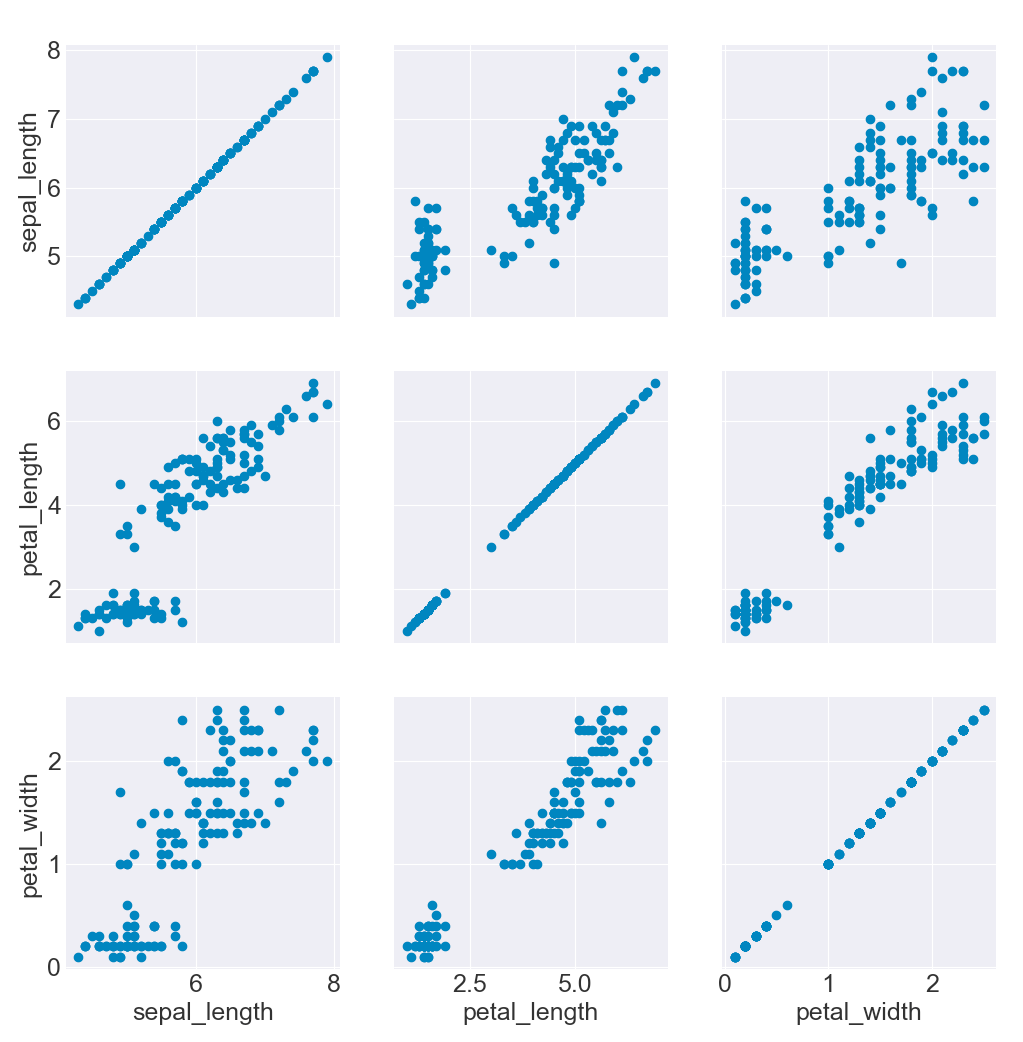

**Question 3:** How could you tell what type(s) of transformation to perform in order to recreate this figure?

**Answer 3:**

I just looked at how the axes were labeled and then put those labels into a list to represent what headers should be in the pair plots.

### 3c) Implement methods that apply a single transformation

It can be convenient to have dedicated methods to apply a single transformation to projected data (without having to pass around matrices). Implement the following methods for this purpose:
- `translate`: Translates the variables `headers` in projected dataset in corresponding amounts specified by `magnitudes`.
- `scale`: Scales the variables `headers` in projected dataset in corresponding amounts specified by `magnitudes`.

#### Test `translate`

- Make a Transformation object with the Iris data
- Project onto the first 3 variables (`sepal_length`, `sepal_width`, `petal_length`).
- Translate x, y, and z by +1 unit each.
- Print out the 1st 5 samples of the result.

In [97]:
# Your test code here

iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data)
trans_headers = ['sepal_length', 'sepal_width', 'petal_length']
iris_trans.project(trans_headers)

trans_mat = iris_trans.translate([1.0,1.0,1.0])

print(trans_mat[:5,:])

[[6.1 4.5 2.4]
 [5.9 4.  2.4]
 [5.7 4.2 2.3]
 [5.6 4.1 2.5]
 [6.  4.6 2.4]]


**Your translate output should look like:**

    [[6.1 4.5 2.4]
     [5.9 4.  2.4]
     [5.7 4.2 2.3]
     [5.6 4.1 2.5]
     [6.  4.6 2.4]]

#### Test `scale`

- Make a Transformation object with the Iris data
- Project onto the first 3 variables (`sepal_length`, `sepal_width`, `petal_length`).
- Scale x, y, and z to 50% each.
- Print out the 1st 5 samples of the result.

In [82]:
# Your test code here

iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data)

scale_headers = ['sepal_length', 'sepal_width', 'petal_length']
iris_trans.project(scale_headers)


scale_mat = iris_trans.scale([0.5,0.5,0.5])
print(scale_mat[:5,:])

[[2.55 1.75 0.7 ]
 [2.45 1.5  0.7 ]
 [2.35 1.6  0.65]
 [2.3  1.55 0.75]
 [2.5  1.8  0.7 ]]


**Your scale output should look like:**

    [[2.55 1.75 0.7 ]
     [2.45 1.5  0.7 ]
     [2.35 1.6  0.65]
     [2.3  1.55 0.75]
     [2.5  1.8  0.7 ]]

### 3d) Solve transformation mystery 2

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto then create/apply transformation matrix (or matrices) to recreate the image below.
- Create a scatter plot identical to the one below based on the projected/transformed data.

**NOTE:** Remember that `Transformation` inherits from `Analysis` so you have access to all those methods.

(array([4.3, 1. ]), array([7.9, 6.9]))


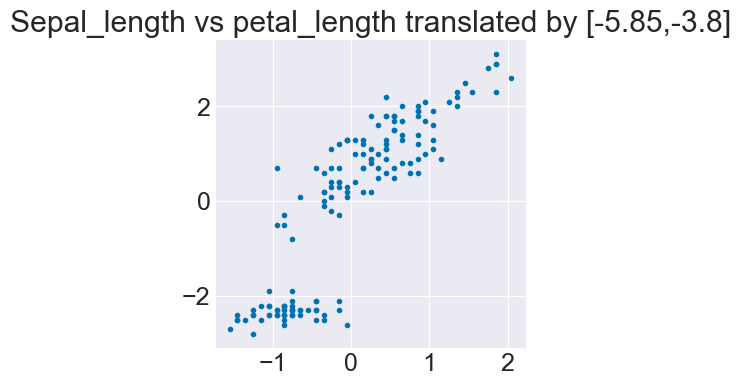

In [83]:
# Your code here

iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data, iris_data)

# iris_trans.scatter('sepal_length', 'petal_length', title ='')
print(iris_trans.range(['sepal_length', 'petal_length']))
# iris_trans.show()

myst2_headers = ['sepal_length', 'petal_length']
iris_trans.project(myst2_headers)
trans_myst2 = iris_trans.translate([-5.85,-3.8])


iris_trans.scatter('sepal_length', 'petal_length', title ='Sepal_length vs petal_length translated by [-5.85,-3.8]')
iris_trans.show()



#### Your results should look like the image below.

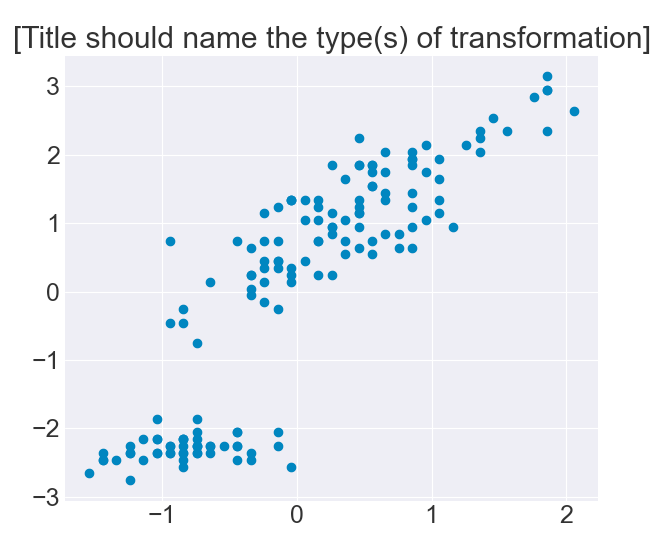

**Question 4:** How could you tell what type(s) of transformation to perform in order to recreate this figure?

**Answer 4:** 

I first looked at the pairplots of all the variables above to see what the shape most resembled. Once I figured out the variables and what axes they'd be on, I plotted them to see how closely they resembled the goal image. I saw that the shape was not stretched or compressed, so it wasn't scaled. Instead, I saw that the shape shifted down and to the left which meant it was a translation that needed to be done.

To find the translation variables, I used the range method from analysis.py. 

### 3e) Solve transformation mystery 3

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto then create/apply transformation matrix (or matrices) to recreate the image below.
- Create a scatter plot identical to the one below based on the projected/transformed data. 

(array([1.19444, 0.04167]), array([2.19444, 1.04167]))


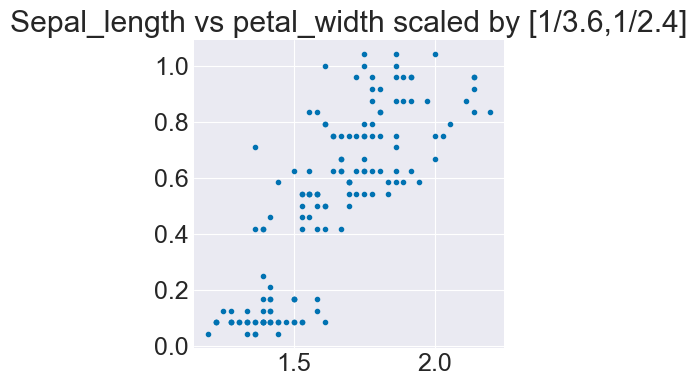

In [84]:
# Your code here
iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data, iris_data)

# iris_trans.scatter('sepal_length', 'petal_width', title ='')
# print(iris_trans.range(['sepal_length', 'petal_width']))
# iris_trans.show()

myst3_headers = ['sepal_length', 'petal_width']
iris_trans.project(myst3_headers)
trans_myst2 = iris_trans.scale([(1/3.6),(1/2.4)])
print(iris_trans.range(['sepal_length', 'petal_width']))
iris_trans.scatter('sepal_length', 'petal_width', title ='Sepal_length vs petal_width scaled by [1/3.6,1/2.4]')
# plt.xticks([1.2,1.4,1.6,1.8,2.0,2.2])
iris_trans.show()

#### Your results should look like the plot below.

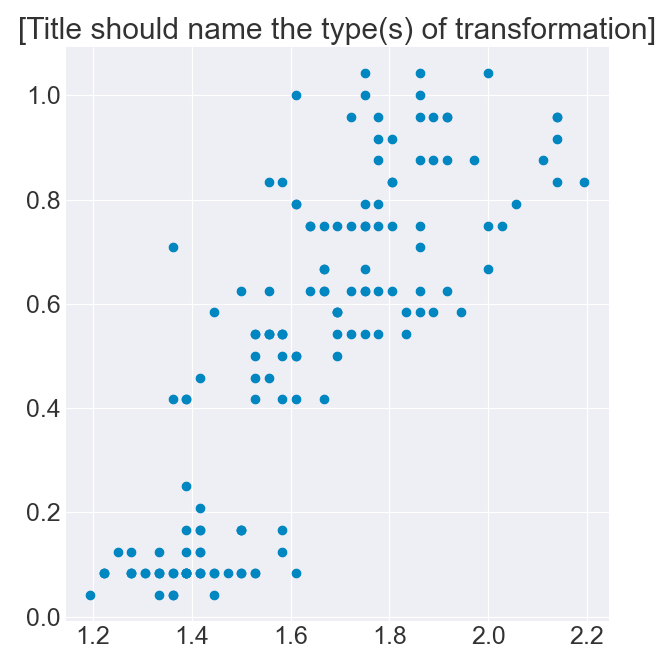

**Question 5:** How could you tell what type(s) of transformation to perform in order to recreate this figure?

**Answer 5:** 

Similar to the process above, I explored the pair plots above to figure out what the two variables would be. Once I did that, I compared the two shapes and determined by eye that it was a scaling transformation. I figured it wasn't translation because the goal graph y-axis started at 0. 

To find the scaling variables, I used the range method from analysis.py. I compared the two ranges from the regular plot and then the scaled graph and divided the scaled graph range by the regular plot range. That's how I found the variables to scale.

## Task 4) Normalization

In this task, you will take advantage of your data transformation pipeline to normalize data in two ways:

1. All the variables together (entire matrix).
2. All the variables separately/independently.

### 4a) Applying compound transformations

Performing data normalization requires a sequence of matrix transformations. In cases like these, it can be convienent to create one compound transformation matrix `C` then multiply it once with the data matrix (instead of doing separate matrix multiplications for each transformation).

Before you start working on the normalization methods, implement the helper method `transform(C)` to transform the PROJECTED dataset by applying the homogeneous transformation matrix `C`.

#### Test `transform`: Perform the compound translation-scaling transformation to the projected data

* Create a Transformation object for the Iris dataset then project onto the first 3 variables: `sepal_length`, `sepal_width`, and `petal_length`.
* Create **and print** a compound transformation matrix `C` in the cell below from translation and scaling matrices that perform the following operations. Remember that order matters when building your compound transformation matrix and the data matrix will ultimately go on the right-hand side.
    - Create a translation matrix that would shift the projected data by -0.5 along `sepal_length` and +1.5 along `petal_length`. 
    - Create a scaling matrix that would scale the projected data by 2 along `sepal_width` and 1/3 along `petal_length`.
- Use the `transform` method to apply it to the projected data. **Print the 1st 5 samples.**

In [85]:
# Your test code here
iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data, iris_data)

headers = ['sepal_length', 'sepal_width', 'petal_length']
iris_trans.project(headers)
t= iris_trans.translation_matrix([-0.5,0,1.5 ])

s = iris_trans.scale_matrix([1,2,(1/3)])
c = s @ t

print('Compound Transformation Matrix')
print(c)

print('Transformed Data')
print(iris_trans.transform(c)[:5,:])


Compound Transformation Matrix
[[ 1.       0.       0.      -0.5    ]
 [ 0.       2.       0.       0.     ]
 [ 0.       0.       0.33333  0.5    ]
 [ 0.       0.       0.       1.     ]]
Transformed Data
[[4.6     7.      0.96667]
 [4.4     6.      0.96667]
 [4.2     6.4     0.93333]
 [4.1     6.2     1.     ]
 [4.5     7.2     0.96667]]


**Your output should look like:**


    Compound transformation matrix:
    [[ 1.       0.       0.      -0.5    ]
     [ 0.       2.       0.       0.     ]
     [ 0.       0.       0.33333  0.5    ]
     [ 0.       0.       0.       1.     ]]

    Transformed data:
    [[4.6     7.      0.96667]
     [4.4     6.      0.96667]
     [4.2     6.4     0.93333]
     [4.1     6.2     1.     ]
     [4.5     7.2     0.96667]]

### 4b) Normalize together

Implement `normalize_together` then test it below by following below steps:

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto to recreate the image below.
- Use a Transformation object to normalize each feature of the Iris dataset __together__.
- Create a pair plot identical to the one below based on the projected/transformed data. 

(<Figure size 1200x1200 with 25 Axes>,
 array([[<AxesSubplot: ylabel='sepal_length'>, <AxesSubplot: >,
         <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
        [<AxesSubplot: ylabel='sepal_width'>, <AxesSubplot: >,
         <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
        [<AxesSubplot: ylabel='petal_length'>, <AxesSubplot: >,
         <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
        [<AxesSubplot: ylabel='petal_width'>, <AxesSubplot: >,
         <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
        [<AxesSubplot: xlabel='sepal_length', ylabel='species'>,
         <AxesSubplot: xlabel='sepal_width'>,
         <AxesSubplot: xlabel='petal_length'>,
         <AxesSubplot: xlabel='petal_width'>,
         <AxesSubplot: xlabel='species'>]], dtype=object))

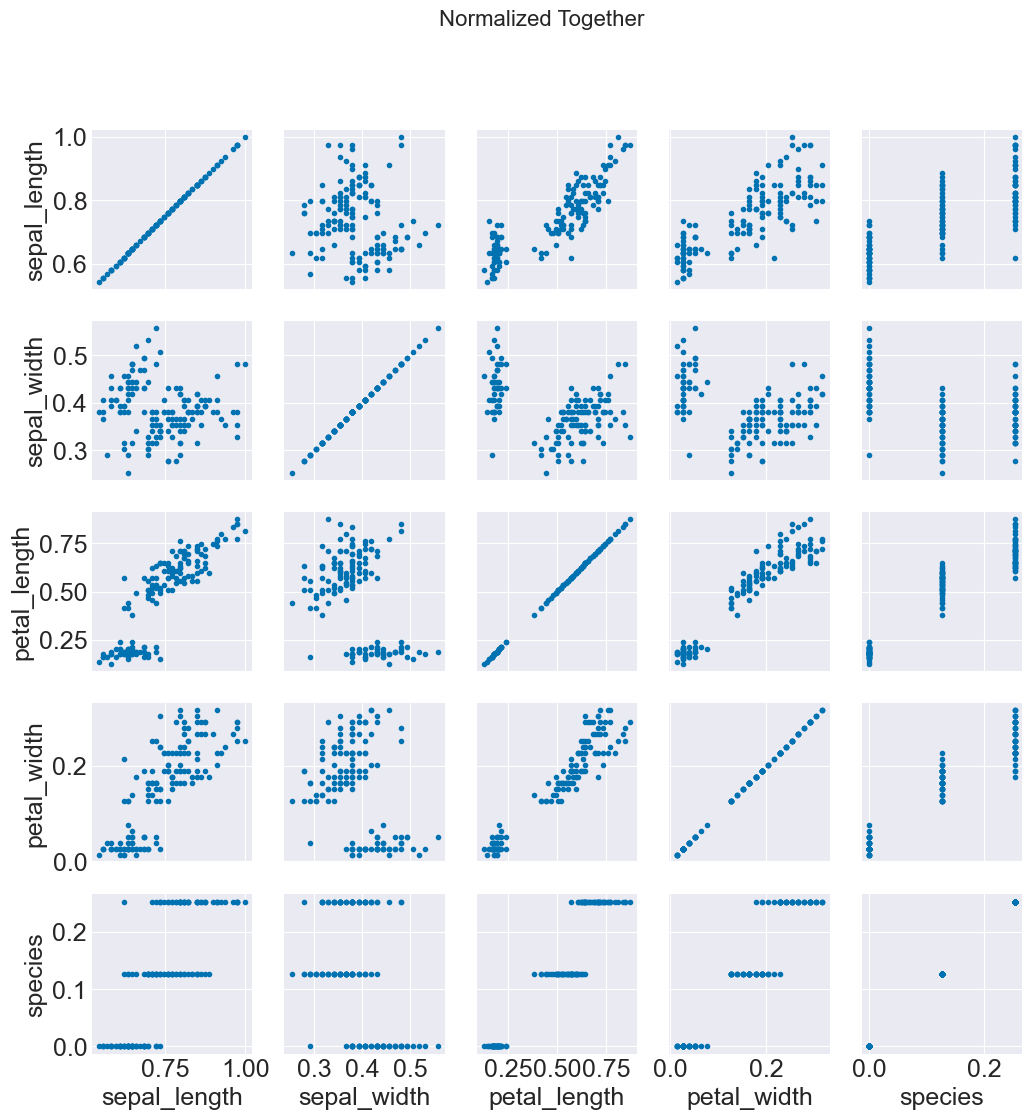

In [86]:
# Your test code here
iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data, iris_data)
headers = iris_data.get_headers()

iris_trans.project(headers)

iris_trans.normalize_together()

iris_trans.pair_plot(headers, title = 'Normalized Together')


#### Your results should look like the image below.

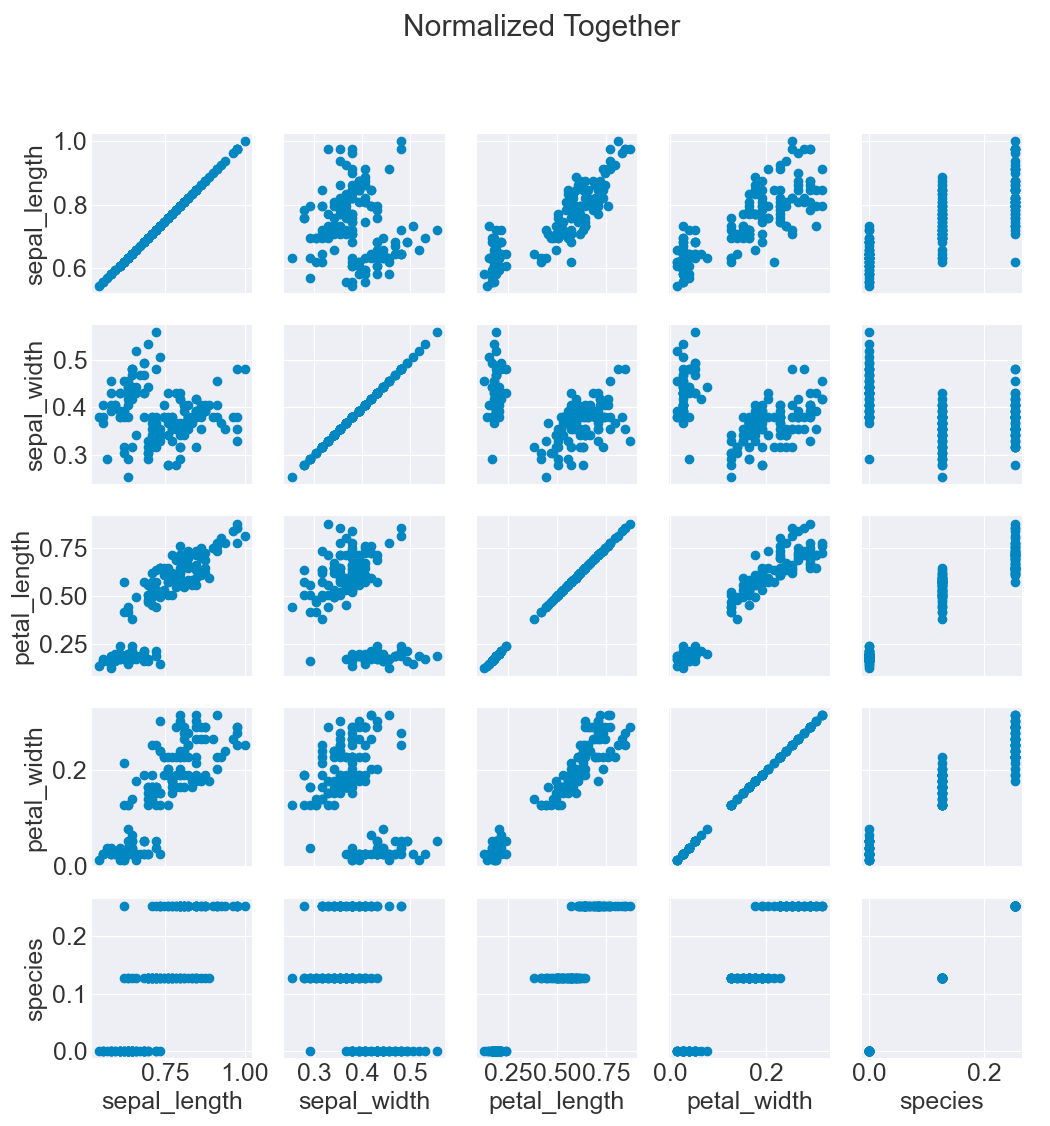

### 4c) Normalize Separately

Implement `normalize_separately` then test it below by following below steps:

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto to recreate the image below.
- Use a Transformation object to normalize each feature of the Iris dataset __separately__.
- Create a pair plot identical to the one below based on the projected/transformed data. 

(<Figure size 1200x1200 with 25 Axes>,
 array([[<AxesSubplot: ylabel='sepal_length'>, <AxesSubplot: >,
         <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
        [<AxesSubplot: ylabel='sepal_width'>, <AxesSubplot: >,
         <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
        [<AxesSubplot: ylabel='petal_length'>, <AxesSubplot: >,
         <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
        [<AxesSubplot: ylabel='petal_width'>, <AxesSubplot: >,
         <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
        [<AxesSubplot: xlabel='sepal_length', ylabel='species'>,
         <AxesSubplot: xlabel='sepal_width'>,
         <AxesSubplot: xlabel='petal_length'>,
         <AxesSubplot: xlabel='petal_width'>,
         <AxesSubplot: xlabel='species'>]], dtype=object))

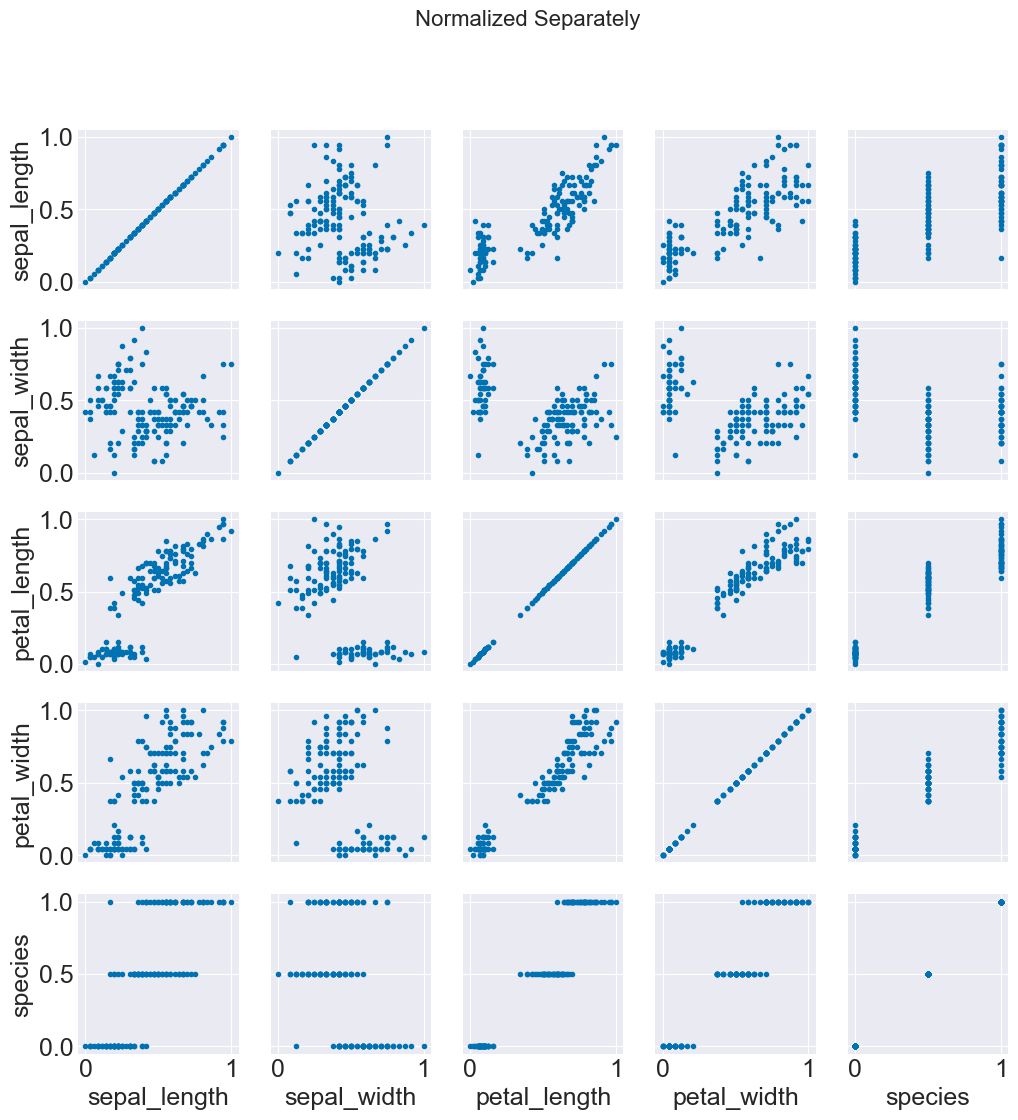

In [88]:
# Your test code here
iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data, iris_data)
headers = iris_data.get_headers()

iris_trans.project(headers)
iris_trans.normalize_separately()
iris_trans.pair_plot(headers, title = 'Normalized Separately')

#### Your results should look like the image below.

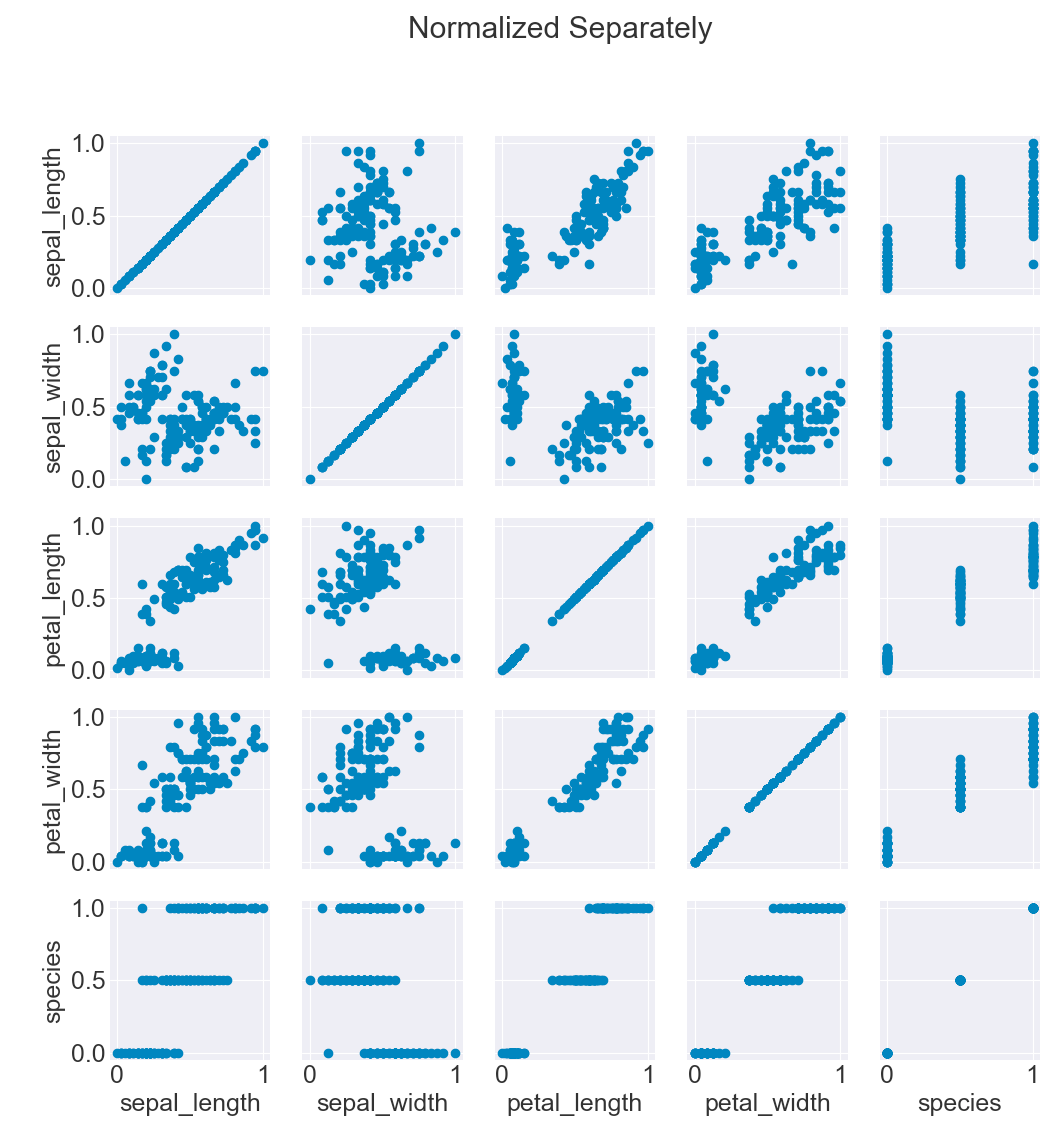

**Question 6:** What type(s) of transformation does normalization require, and in words, what is the meaning of the transformation matrix parameter values used?

**Answer 6:**

Normalization requires translation and scaling. For normalize_together, the data is translated by the minimum element of the entire array times negative one. The data is scaled by 1/range of the dataset. To normalize separately, the translation matrix includes the minimum value for each column so that each value is different. The scaling matrix also corresponds to 1/range except the range is specific to each column.

## Task 5) Mystery Letter Dataset

In this task your goal is to find the 3 capital letters hidden in a dataset with 3 variables (3D data). You will begin by implementating methods to create rotation matrices and apply rotation. This operation will play an important role in discovering and transforming the data to uncover these letters.

### Task 5a) Rotation matrices

Implement the following methods then fill in the cells below to test your code.

- `rotation_matrix_3d(header, degrees)`: Make an 3-D homogeneous rotation matrix for rotating the projected data about the ONE axis/variable `header`.
- `rotate_3d`: Rotates the projected data about the variable `header` by the angle (in degrees) `degrees`

#### Test (i): `rotation_matrix_3d`

- Make a Transformation object with the Iris data
- Project onto the first 3 variables (`sepal_length`, `sepal_width`, `petal_length`).
- Create a rotatation matrix that would rotate the Transformation object's projected data by 45 degrees about `petal_length`, and print the rotation matrix.

In [89]:
# Your test code here
iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data, iris_data)
headers = ['sepal_length', 'sepal_width', 'petal_length']

iris_trans.project(headers)
print(iris_trans.rotation_matrix_3d('petal_length', 45))

[[ 0.70711 -0.70711  0.       0.     ]
 [ 0.70711  0.70711  0.       0.     ]
 [ 0.       0.       1.       0.     ]
 [ 0.       0.       0.       1.     ]]


**Your output should look like:**

    Rotation matrix:
    [[ 0.70711 -0.70711  0.       0.     ]
     [ 0.70711  0.70711  0.       0.     ]
     [ 0.       0.       1.       0.     ]
     [ 0.       0.       0.       1.     ]]

#### Test (ii): `rotate_3d`

- Using the same Transformation object created in the previous test, rotate about `sepal_length` 10 deg.
- Print out the 1st 5 samples of the result.

In [90]:
# Your test code here
print(iris_trans.rotate_3d('sepal_length', 10)[:5,:])

[[5.1     3.20372 1.9865 ]
 [4.9     2.71132 1.89968]
 [4.7     2.92564 1.83592]
 [4.6     2.79243 2.01552]
 [5.      3.3022  2.00386]]


**Your rotation output should look like:**

    [[5.1     3.20372 1.9865 ]
     [4.9     2.71132 1.89968]
     [4.7     2.92564 1.83592]
     [4.6     2.79243 2.01552]
     [5.      3.3022  2.00386]]

### Task 5b)  Mystery Letter Dataset

Your goal is to find the 3 capital letters hidden in `letter_data.csv` with 3 variables (3D data) and create single scatter plots showing each individual letter plotted right-side up. 
- Create Data and Transformation objects for the Letters dataset (`letter_data.csv`).
- Normalize the data seperately then apply transformations to find the hidden letters (scaling, translating and/or rotation).

**Hints:**
- Remember: Applying transformations changes the data stored in the `Transformation` object (i.e. the effects on the data compound). After searching for and identifying one letter, it might be helpful to start with the original data again. This can be achieved by re-projecting and normalizing.
- Visualize the data using `pair_plot` and/or `scatter` after applying a transformation.
- Downloading and running `scatter3d.py` from Terminal will produce an interactive 3D scatterplot. Feel free to use this tool to explore the data and inform your decisions about which transformations to use.

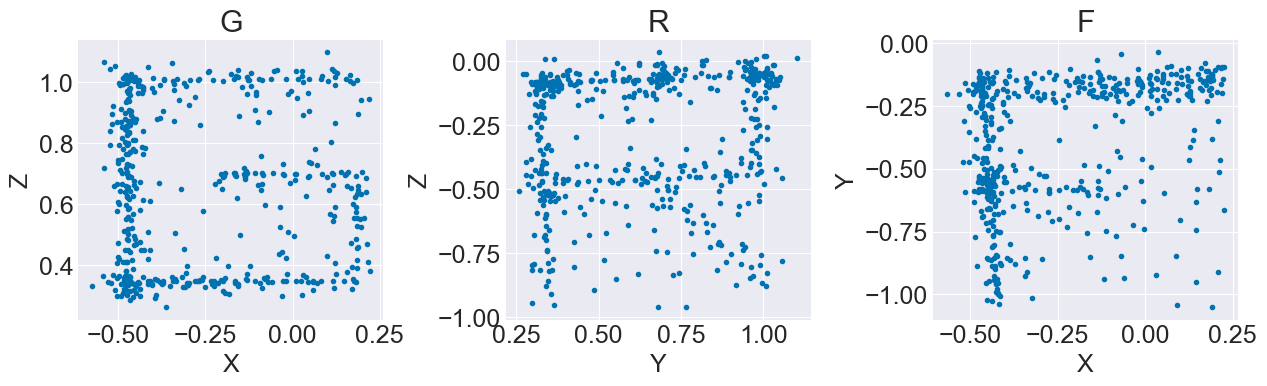

In [91]:
# Your code here
letter_filename = 'letter_data.csv'
letter_data = data.Data(letter_filename)
letter_trans = transformation.Transformation(letter_data, letter_data)

headers = letter_data.get_headers()
letter_trans.project(headers)
letter_trans.normalize_separately()
# letter_trans.pair_plot(headers)


letter_transG = transformation.Transformation(letter_data, letter_data)
letter_transG.project(headers)
letter_transG.normalize_separately()
plt.subplot(131)
letter_transG.rotate_3d('Y', -30)
letter_transG.rotate_3d('Z', 180)
letter_transG.rotate_3d('X', 0)
letter_transG.scatter('X', 'Z', title ='G')
plt.xlabel('X')
plt.ylabel('Z')

letter_transR = transformation.Transformation(letter_data, letter_data)
letter_transR.project(headers)
letter_transR.normalize_separately()
plt.subplot(132)
letter_transR.rotate_3d('Y', -25)
letter_transR.rotate_3d('Z', 0)
letter_transR.rotate_3d('X', -87)
plt.xlabel('Y')
plt.ylabel('Z')
letter_transR.scatter('Y', 'Z', title ='R')

letter_transF = transformation.Transformation(letter_data, letter_data)
letter_transF.project(headers)
letter_transF.normalize_separately()
plt.subplot(133)
letter_transF.rotate_3d('Y', -30)
letter_transF.rotate_3d('Z', 183)
letter_transF.rotate_3d('X', 5)
plt.xlabel('X')
plt.ylabel('Y')
letter_transF.scatter('X', 'Y', title ='F')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=3,
                    top=0.8,
                    wspace=0.4,
                    hspace=0.8)

**Question 7:** Which letters did you find?  How could you tell what type(s) of transformations needed to be performed to find the letters?

**Answer 7:** 

I found the letters: GRF. Using scatter3d.py, I could tell what letters were on what axes. So, I made 3 subplots with the different axes and then rotated them until they resembled the shapes I saw on the 3d visualization file.

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

### 1. Explore additional visualizations

- Implement a scatter plot version that uses the marker size aesthetic to visualize another dimension of data (up to 4D).
- Implement a scatter plot version that uses both color and marker size aesthetics (up to 5D).

Extension 1:
I implemented a scatter plot method that can plot up to 4 dimensions by having 3 axes and then a color bar to represent the 4th dimension. The parameters are the headers that correspond to the x-axis, y-axis, z-axis, and the data that will go on the colorbar. I used a color pallette that is suitable for colorblind people. I imported 3d axes from matplotlib in order to create 3 axes and then used a similar technique as in the scatter_color method to get the colorbar.

Extension 2:
I implemented another scatter plot method that can plot up to 5 dimensions of data. 3 dimensions are on 3 axes, one is on a color bar, and the last one is represented by the size of the markers. The parameters are all the same as the 4d implementation with the addition of a header for the 5th dimension.

To change the marker size to correspond to the data, I used the max and min methods to scale it according to the range of the data. I plotted the same data as in the last extension with the addition of world gross. This new visualization shows that films with more domestic gross seem to have more worlwide gross as well. Also, because the title became so long, I used the fontdict parameter in title() to have more control.

Extension 3:
I used a new dataset to visualize and test these methods. The dataset I used to visualize the 4d scatter plot is a list of the highest grossing films in 2022 and includes features such as the overall domestic gross, opening weekend gross, max theaters the film was in, and the international gross. These were also the 4 variables that I plotted. There are patterns that are shown. For example, films with higher grosses were released in more theaters.

Sources: 
https://www.kaggle.com/datasets/kabhishm/highest-grossing-movies-of-2022
Geekforgeeks tutorial on colorbar: https://www.geeksforgeeks.org/matplotlib-pyplot-colorbar-function-in-python/


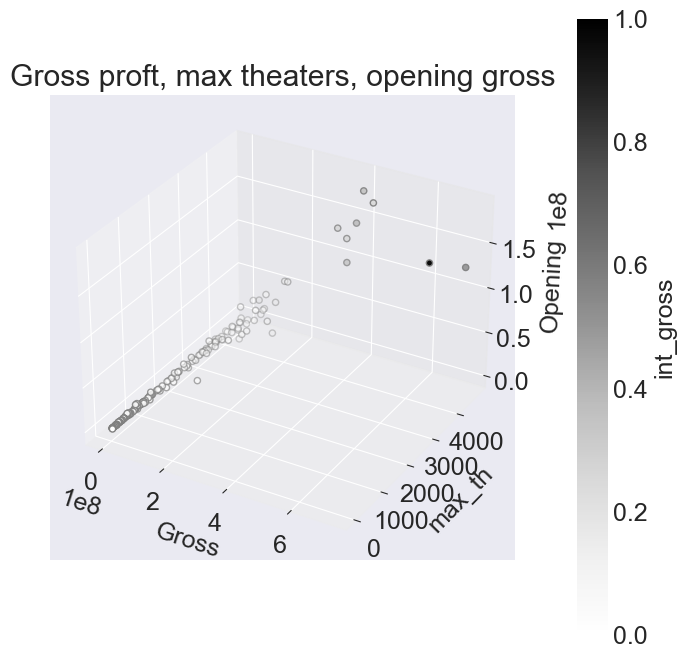

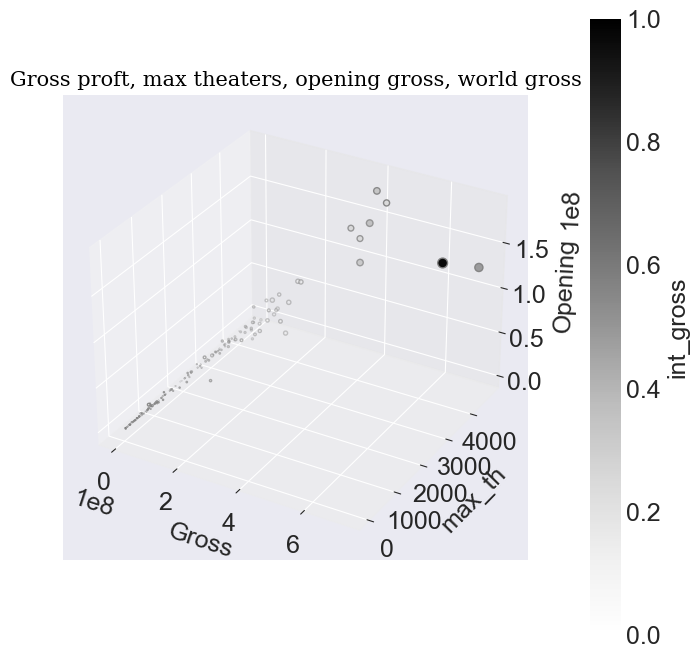

In [92]:
%matplotlib inline
# creating a transformation object for the dataset
movie_filename = 'highest_gr_movies_2022 .csv'
movie_data = data.Data(movie_filename)
movie_trans = transformation.Transformation(movie_data, movie_data)


movie_trans.scatter_4d('Gross', 'max_th', 'Opening', 'int_gross', title = 'Gross proft, max theaters, opening gross')
movie_trans.scatter_5d('Gross', 'max_th', 'Opening', 'int_gross','world_gross', title = 'Gross proft, max theaters, opening gross, world gross')


### 2. Perform different matrix transformations on data

- Normalize by Z-score rather than min/max.
- "Whiten" a dataset.
- Implement normalize together and separately using numpy vectorization/broadcasting. Compare the approaches in efficiency (time and compare the two implementations).

Extension 4:

For this extension, I implemented a method to normalize the dataset by z-scores. Z-scores show how many standard deviations a data point is away from the mean. I made a method in transformation.py that calculated the zscores and returned it as a numpy array. This array is the normalized dataset. In the code cell below, I pairplotted the original data and the the normalized by zscore data. A clear difference is that the axes became much smaller in the normalized set.

(<Figure size 1200x1200 with 25 Axes>,
 array([[<AxesSubplot: ylabel='sepal_length'>, <AxesSubplot: >,
         <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
        [<AxesSubplot: ylabel='sepal_width'>, <AxesSubplot: >,
         <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
        [<AxesSubplot: ylabel='petal_length'>, <AxesSubplot: >,
         <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
        [<AxesSubplot: ylabel='petal_width'>, <AxesSubplot: >,
         <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
        [<AxesSubplot: xlabel='sepal_length', ylabel='species'>,
         <AxesSubplot: xlabel='sepal_width'>,
         <AxesSubplot: xlabel='petal_length'>,
         <AxesSubplot: xlabel='petal_width'>,
         <AxesSubplot: xlabel='species'>]], dtype=object))

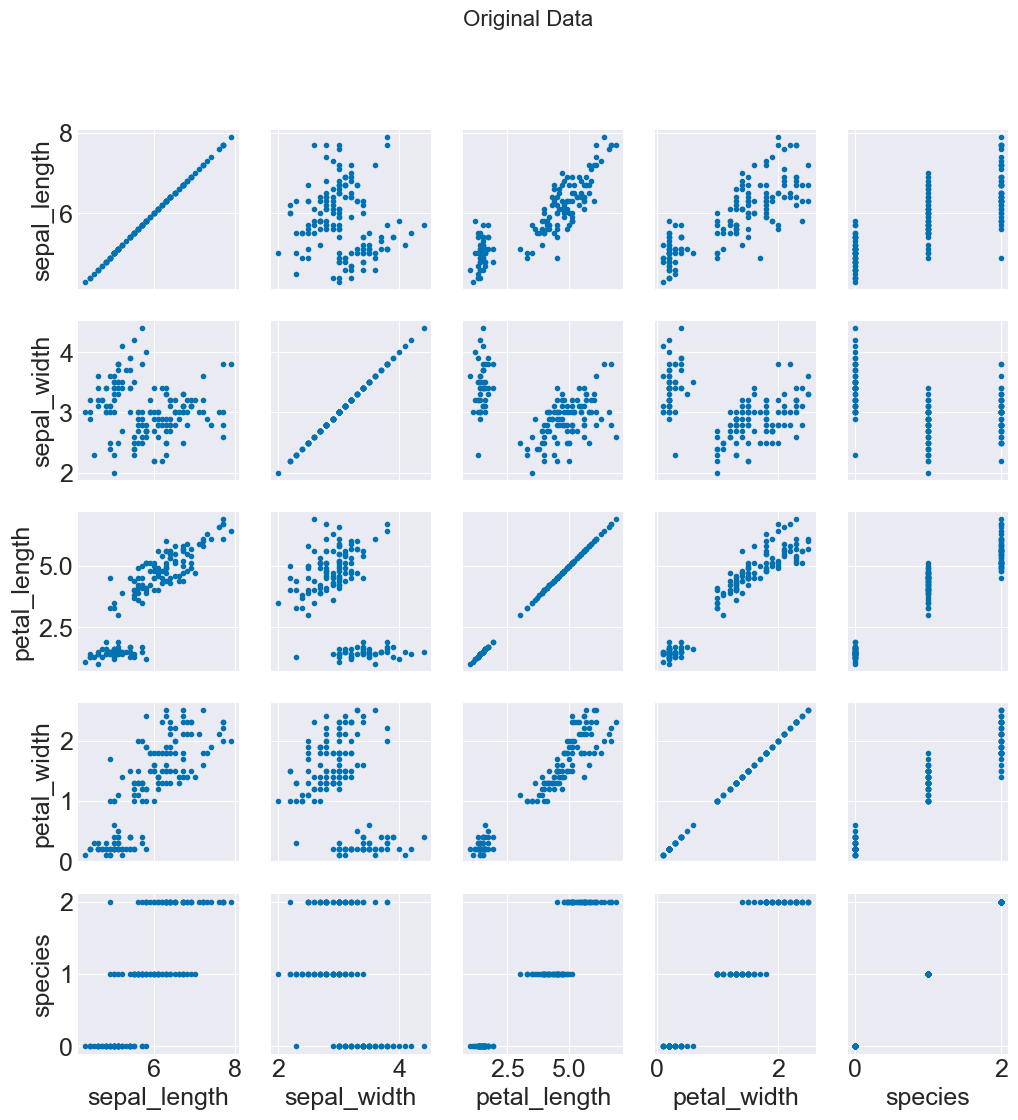

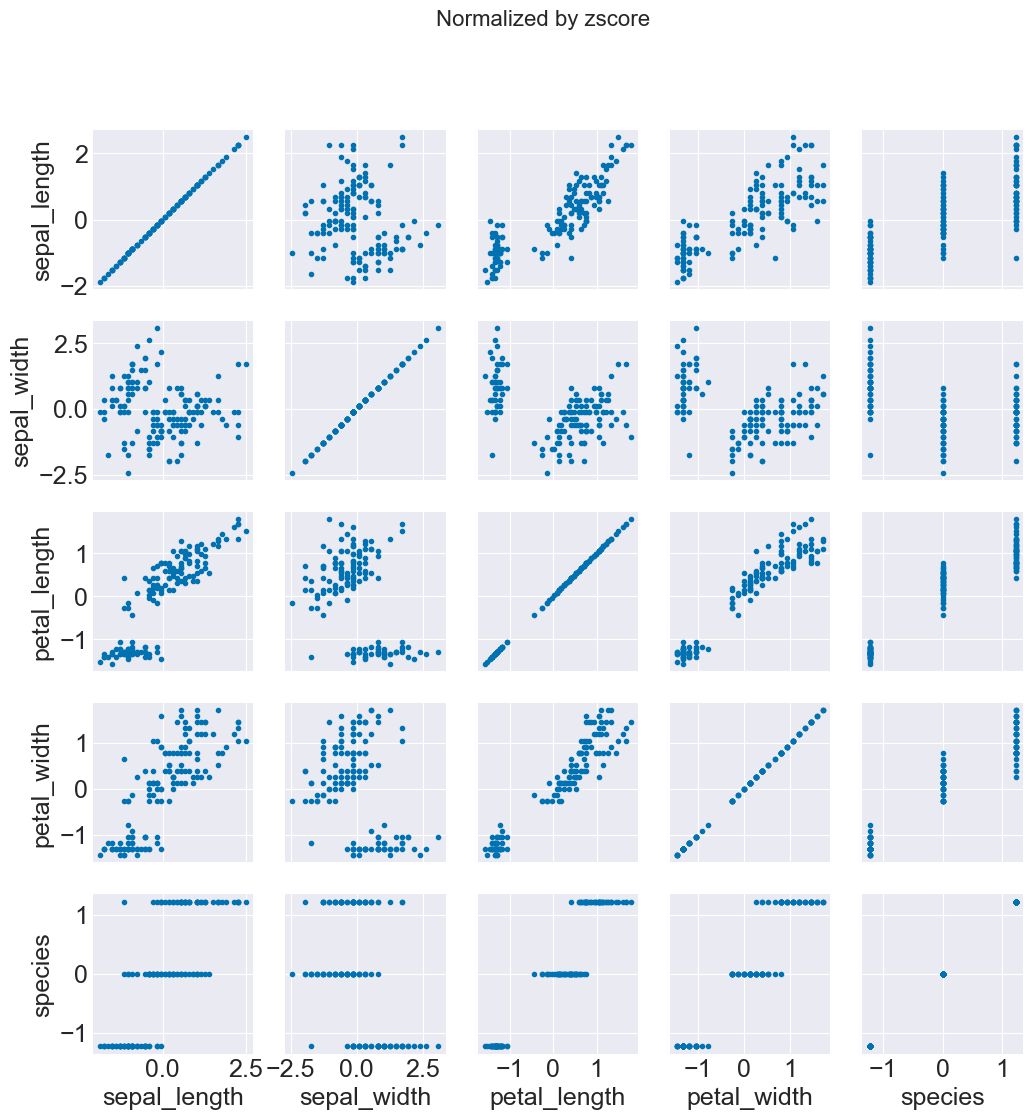

In [93]:
iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data, iris_data)

iris_trans.pair_plot(iris_data.get_headers(), title = 'Original Data')

iris_transz = transformation.Transformation(iris_data, iris_data)
iris_transz.zscore_normalize(iris_data.get_headers())
iris_transz.pair_plot(iris_data.get_headers(), title = 'Normalized by zscore')

### 3. Implement and use 2D rotation

Extension 5:

I decided to implement 2d rotation for this extension. Unlike 3d rotation, there is only one type of rotation matrix that can be made because there are only two dimensions to be dealt with. I created a method to create the rotation matrix and then a method to implement the rotation. Both methods only have one parameter which is how many degrees the dataset will be rotated. I gave the dataset a homogenous coordinate, made sure it was transposed correctly, and then implemented the rotation. 

To test the method, I projected only 2 variables from the iris dataset to make it a 2d dataset. I decided to rotate it by 90 degrees. I also created subplots of the normal and then the rotated dataset to visualize the dataset.

Sources:
Stephanie Taylor's Lecture Notes 

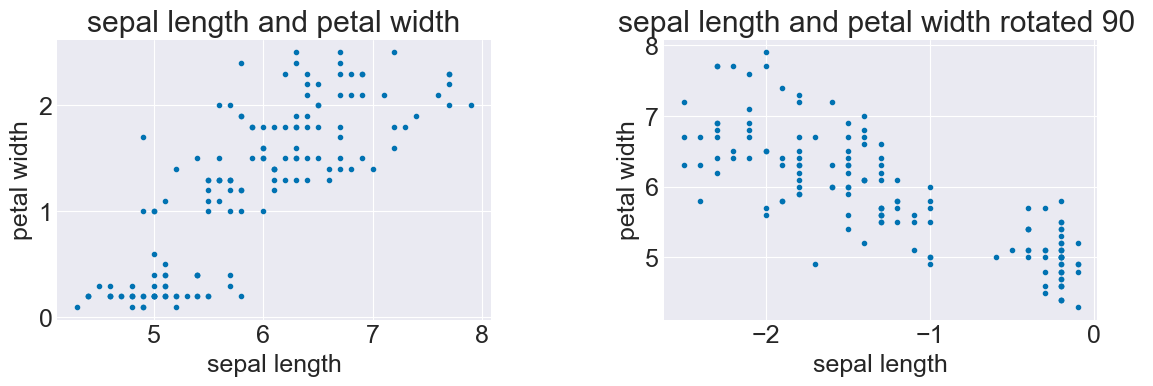

In [94]:
iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_trans = transformation.Transformation(iris_data, iris_data)

plt.subplot(121)
iris_trans.scatter('sepal_length', 'petal_width', title = 'sepal length and petal width')
plt.xlabel('sepal length')
plt.ylabel('petal width')

plt.subplot(122)
iris_transr = transformation.Transformation(iris_data, iris_data)
iris_transr.project(('sepal_length', 'petal_width'))
iris_transr.rotate_2d(90)
iris_transr.scatter('sepal_length', 'petal_width', title = 'sepal length and petal width rotated 90 ')
plt.xlabel('sepal length')
plt.ylabel('petal width')

plt.subplots_adjust(left=1.4,
                    bottom=0.1,
                    right=4,
                    top=0.8,
                    wspace=0.4,
                    hspace=0.8)



### 4. Apply matrix transformations and visualization a dataset of your choice